##**Introduction**- 
###My dataset is about the weather of Australia in different cities from year 2008 till 2017.


### **Part 1- (Reading CSV file to DataFrame and showing initial 5 rows)**

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import numpy as np
import io
import pandas as pd
import seaborn as sns
from google.colab import files
import datetime as dt

uploaded = files.upload()
original_data_of_ausWeather = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))
original_data_of_ausWeather.head(5)

Saving weatherAUS.csv to weatherAUS.csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### **Part 2- Univariate Analysis**

In [ ]:
original_data_of_ausWeather.shape

(145460, 23)

In [ ]:
original_data_of_ausWeather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

a)
**Problem**
Descriptive Statistics (using describe() function) 

**Output**
Returns the statistical data like mean,count, min etc.

In [ ]:
original_data_of_ausWeather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# To describe the values of string column like Location
# Output- count, unique, top and frequency
original_data_of_ausWeather['Location'].describe()


count       145460
unique          49
top       Canberra
freq          3436
Name: Location, dtype: object

b) **Problem**- Identify presence of missing values and duplicates for each column and row

**Output**- Return the non-duplicate columns


In [ ]:
# Presence of Missing values- In this, i will identify which column contains null values
#Output- It will scan all the columns and check if any column contains the null value, if a column has a null value then it will return True else False

original_data_of_ausWeather.isnull().any()


Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [ ]:
# It will return the list of columns which contain the null values
original_data_of_ausWeather.loc[:,original_data_of_ausWeather.isnull().any()].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Check whether there is any duplicate columns and rows in a data set

# -Check dulpicate columns dynamically

def tractduplicates(original_data_of_ausWeather):
    duplicateColumns=set()
    for cols in range(0,original_data_of_ausWeather.shape[1]):
      selected_col=original_data_of_ausWeather.iloc[:,cols]
      for new_col in range(cols+1,original_data_of_ausWeather.shape[1]):
        other_col=original_data_of_ausWeather.iloc[:,new_col]
        if selected_col.equals(other_col):
          duplicateColumns.add(original_data_of_ausWeather.columns.values[new_col]) 
    return list(duplicateColumns) 

if tractduplicates(original_data_of_ausWeather)==[]:
  print('No duplicate columns found')
  new_data_set=original_data_of_ausWeather
else:
  new_data_set=original_data_of_ausWeather.drop(columns = tractduplicates(original_data_of_ausWeather))
  new_data_set


No duplicate columns found


In [ ]:
# -Check dulpicate rows in a dataset

original_data_of_ausWeather.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [ ]:
# After identify duplicates, now in this step, i will drop all the duplicates if found

data_set_after_droping_duplicates = original_data_of_ausWeather.drop_duplicates(subset=None, keep='first', inplace=False)
data_set_after_droping_duplicates

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
# Compare the original data set length and new data set length

print('Original data set length')
len(original_data_of_ausWeather)

location_column=new_data_set['Location'].drop_duplicates()
list_of_uniqueLocations=location_column.to_numpy()
list_of_uniqueLocations

year_array = pd.to_datetime(new_data_set['Date'], errors='coerce')
year_array=year_array.dt.year.drop_duplicates().sort_values().to_numpy()
year_array

Original data set length


array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

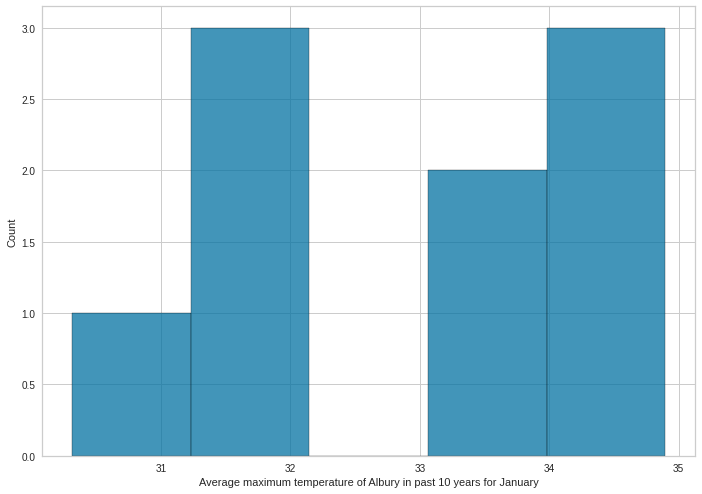

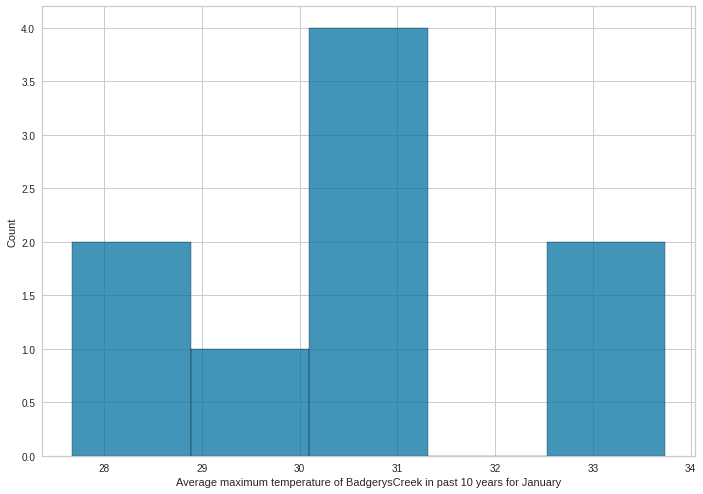

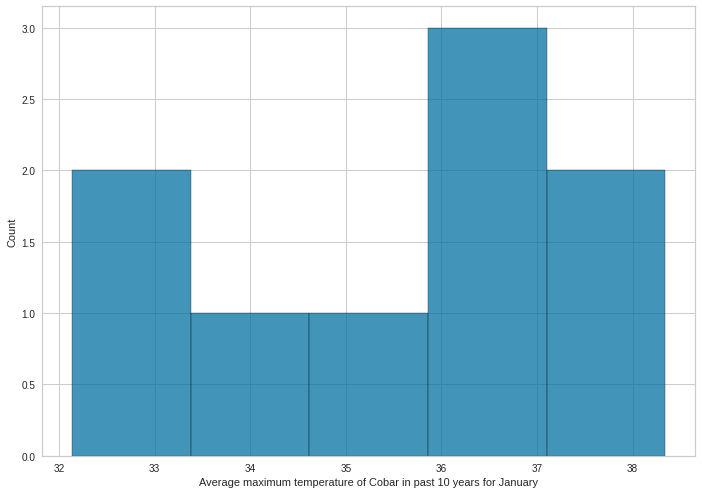

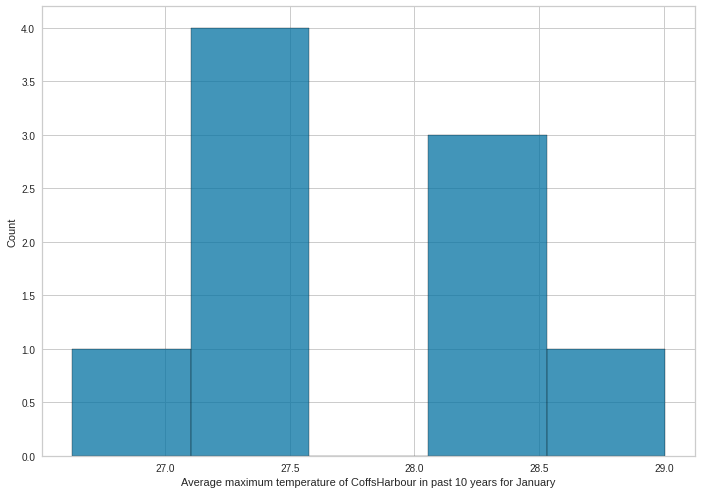

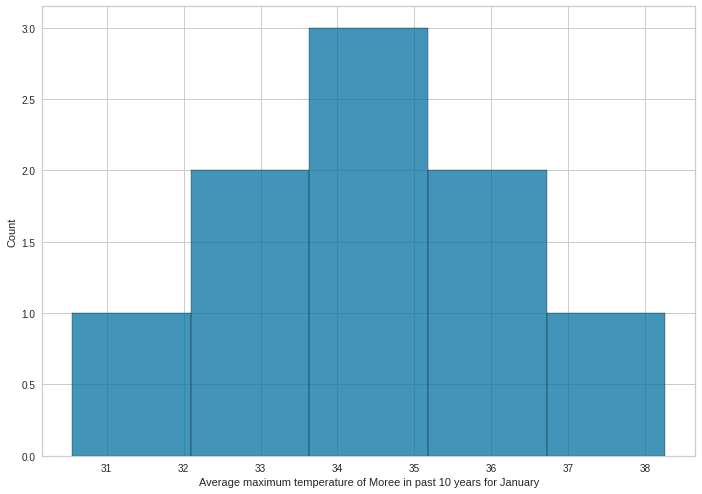

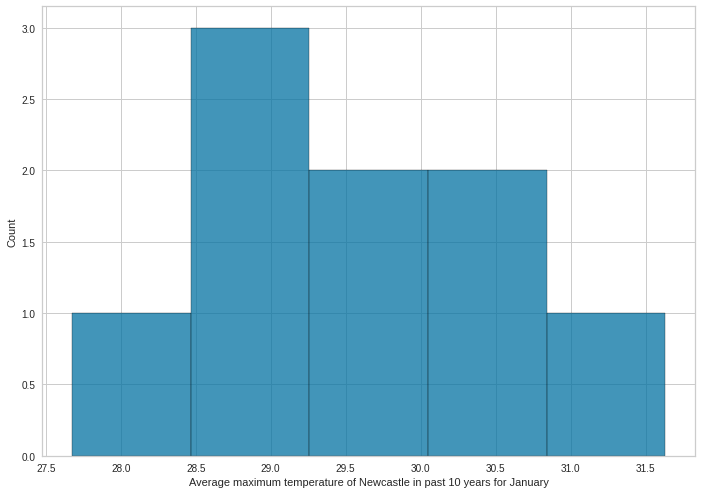

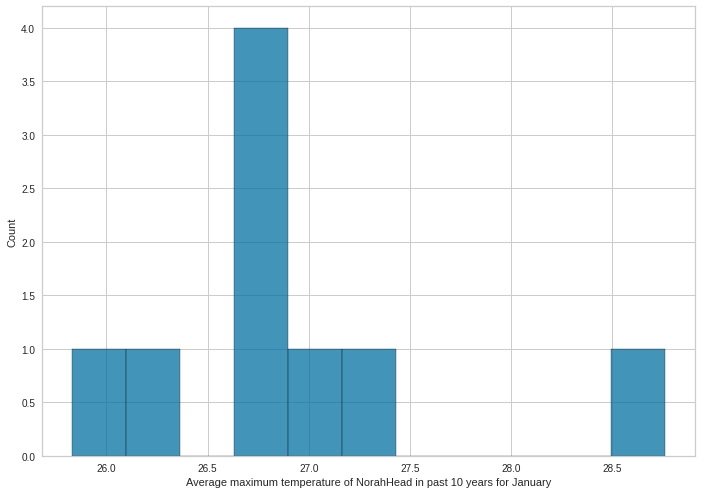

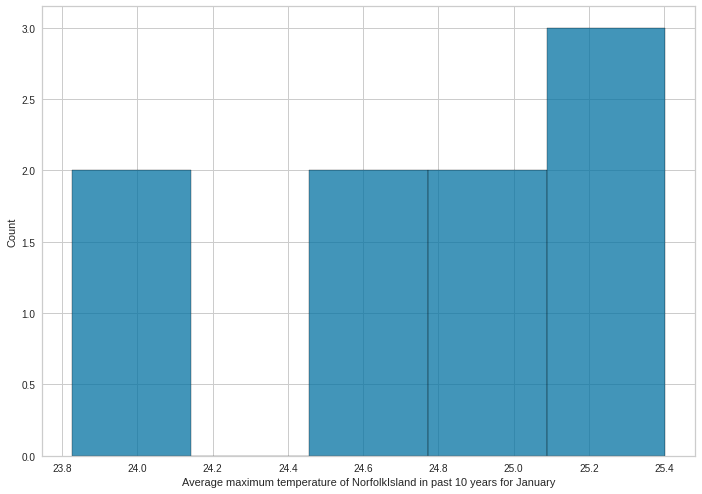

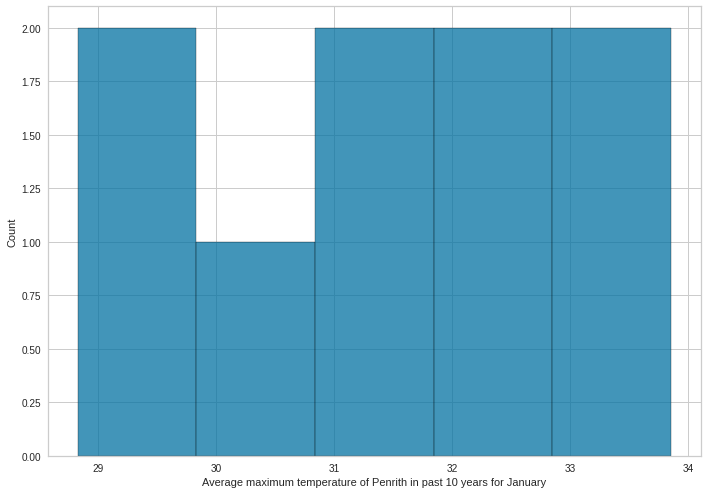

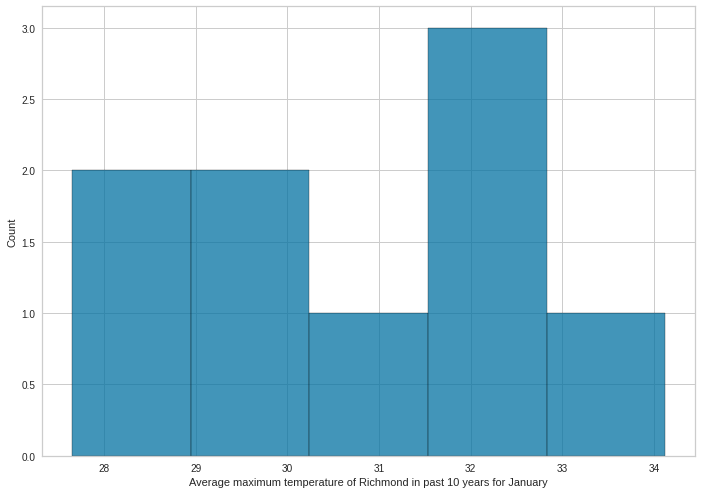

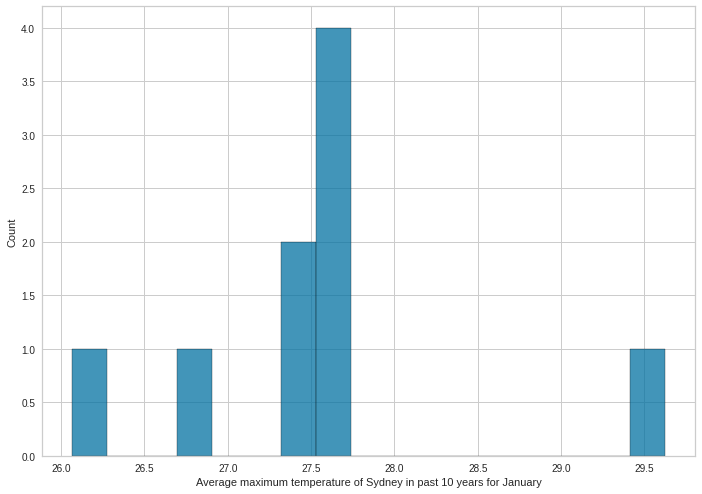

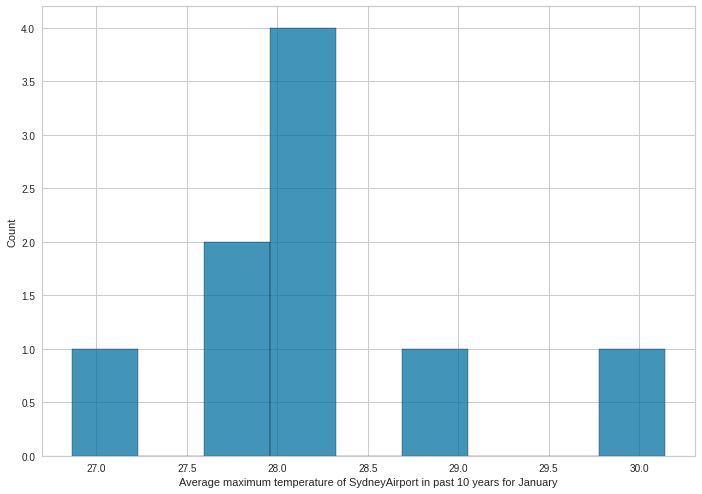

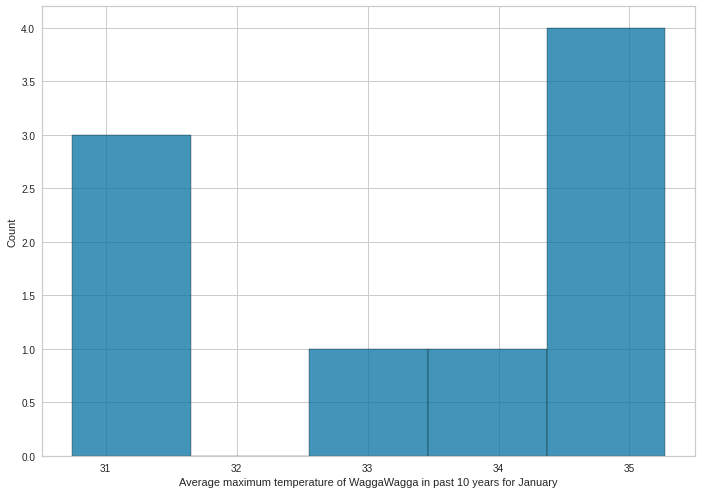

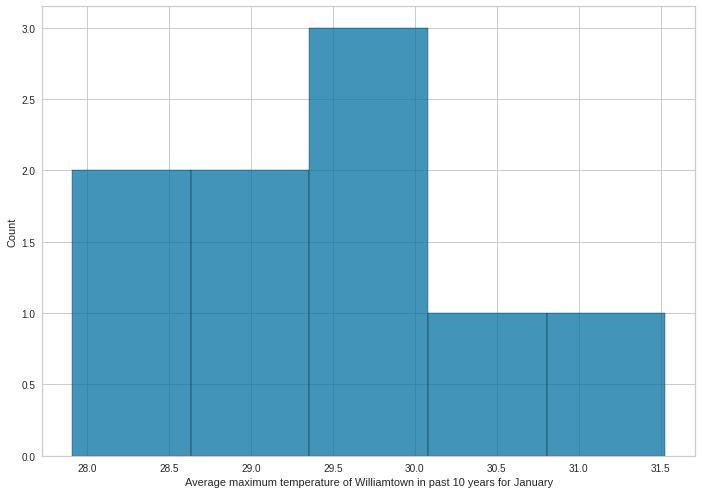

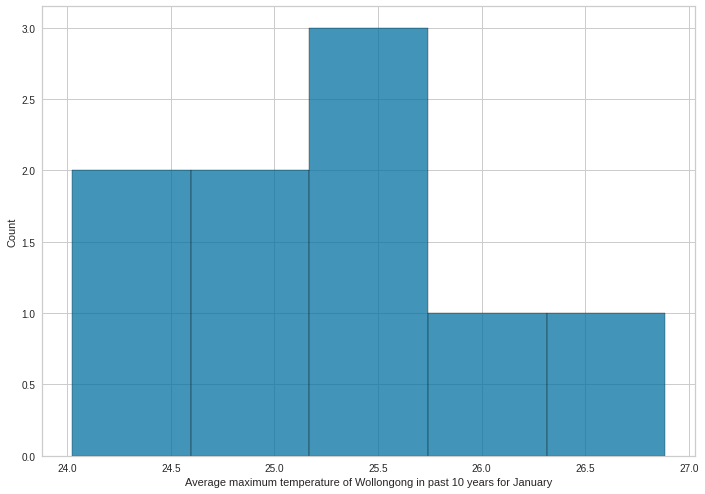

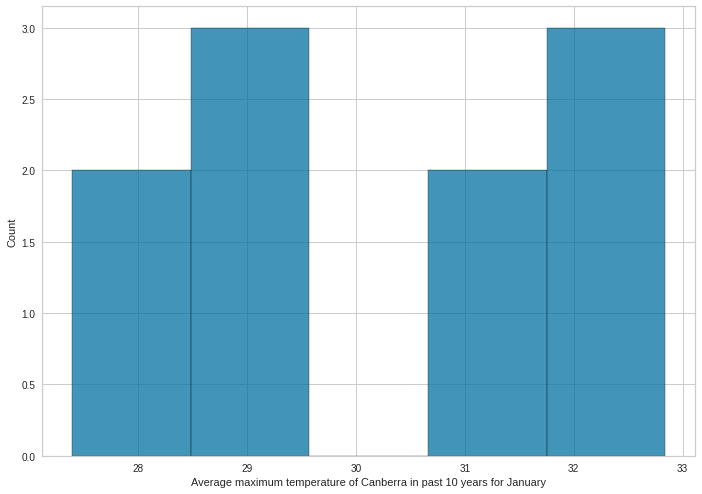

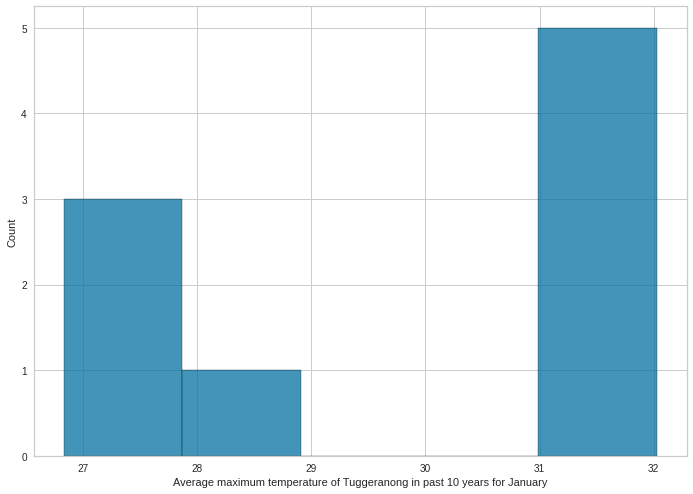

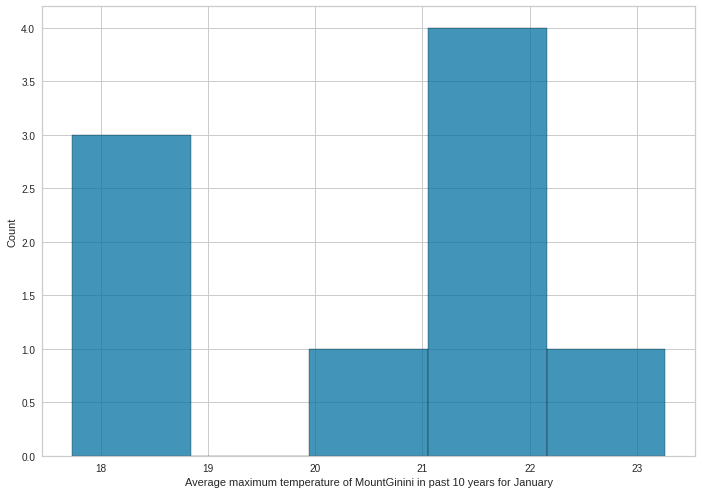

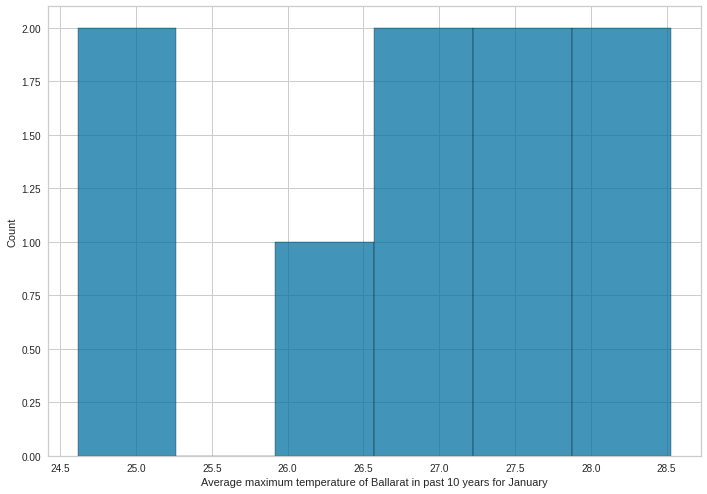

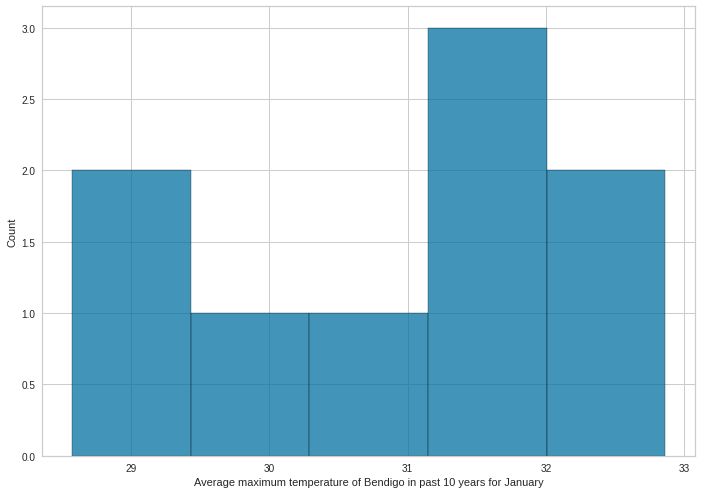

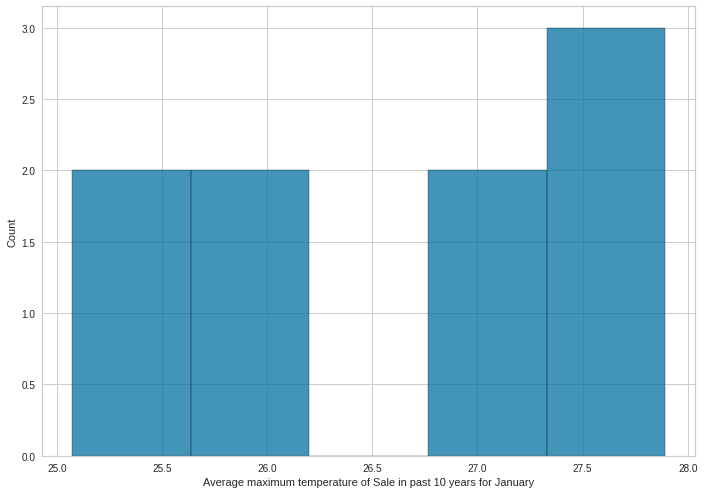

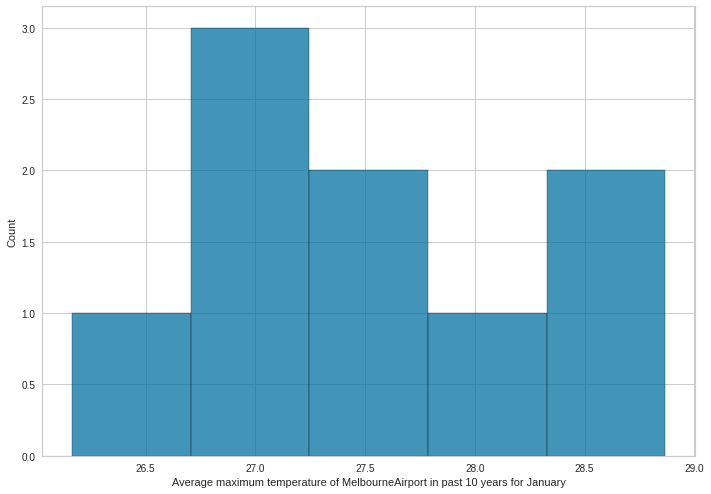

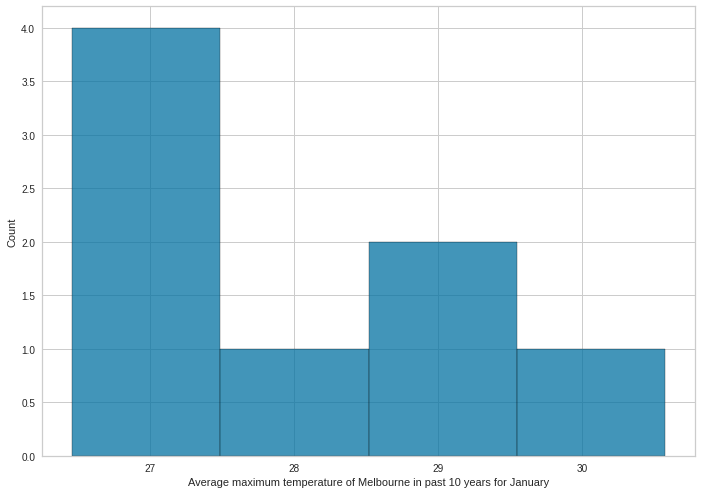

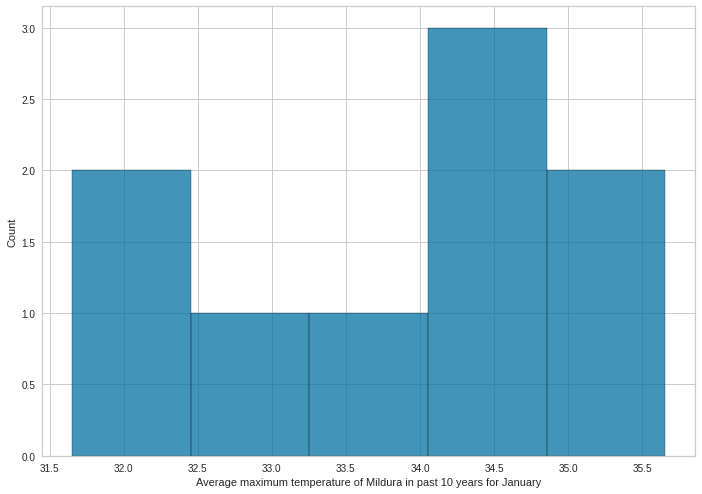

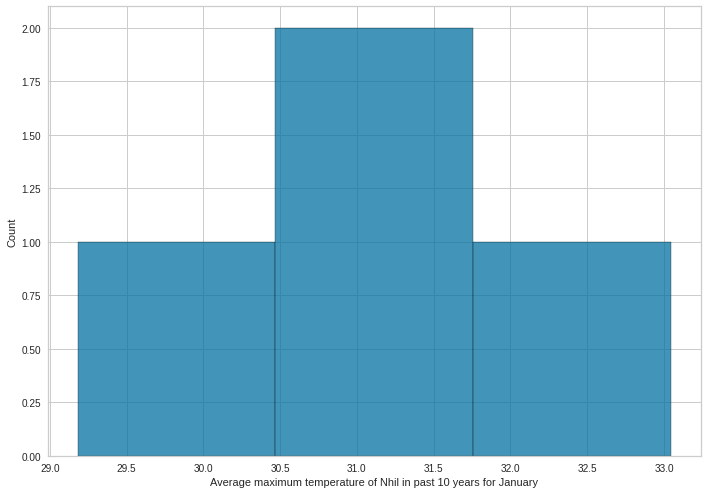

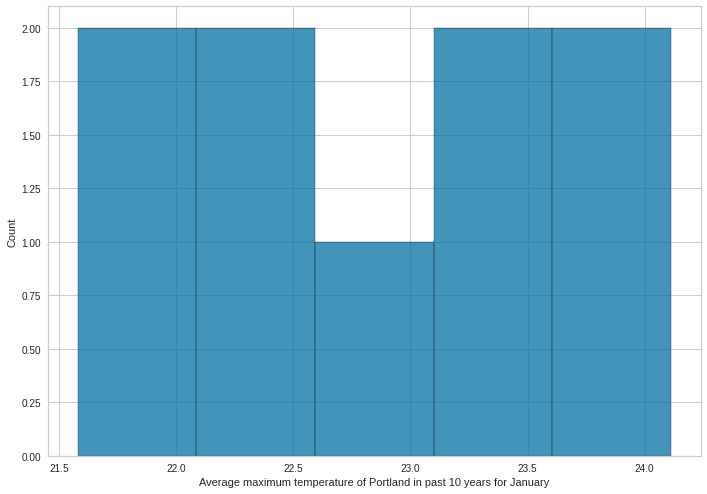

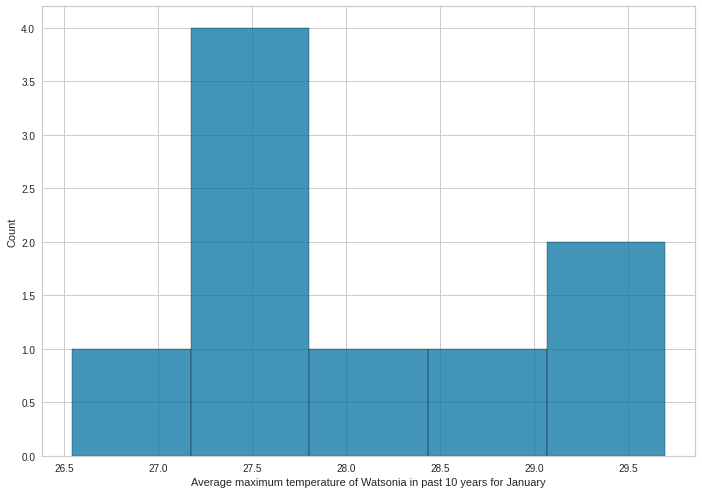

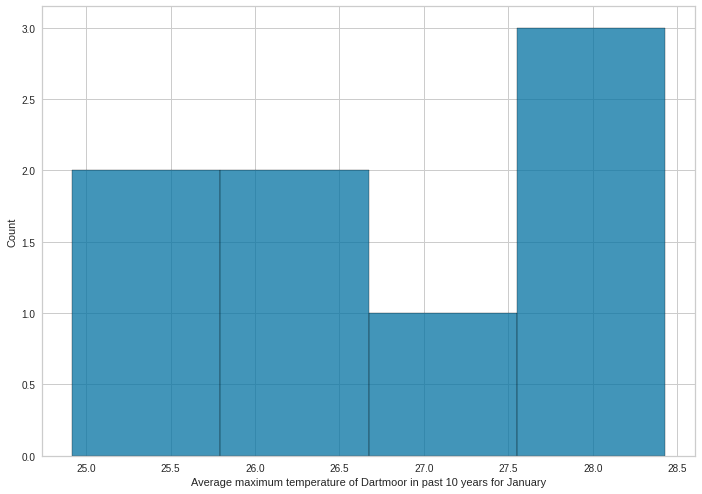

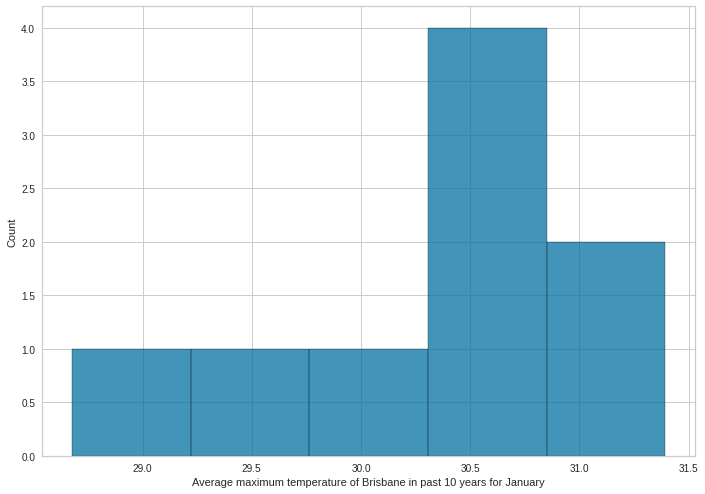

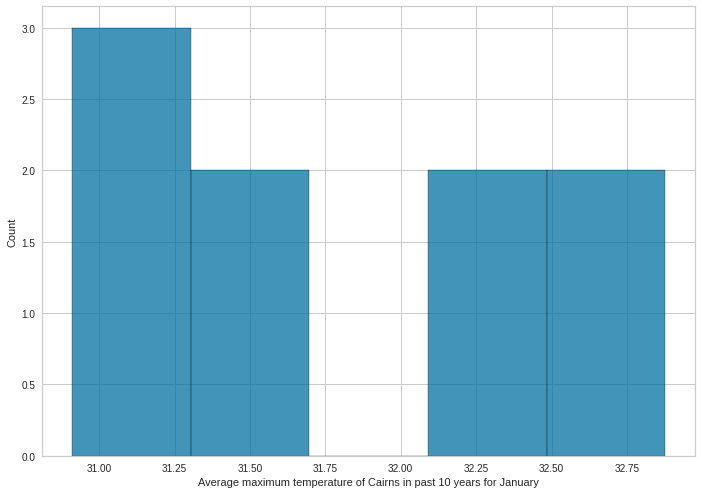

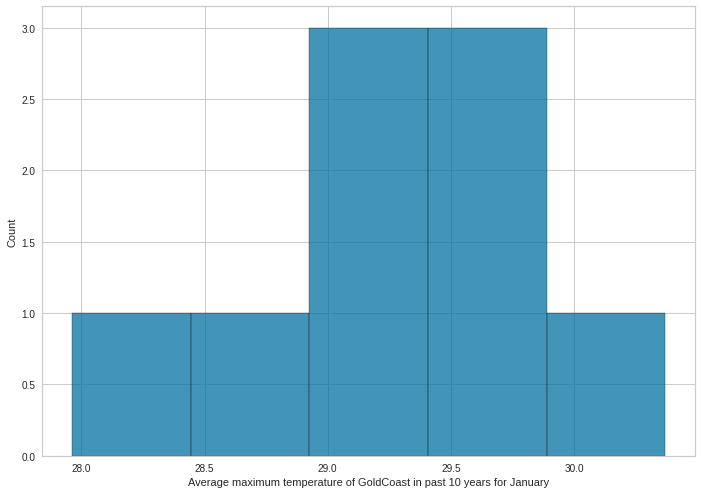

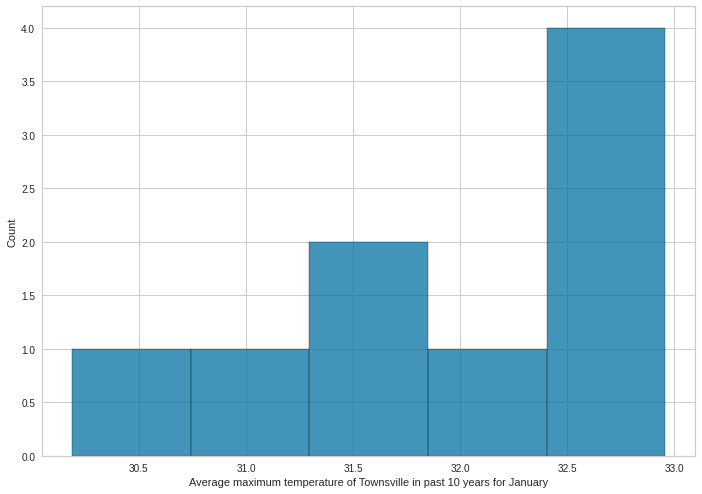

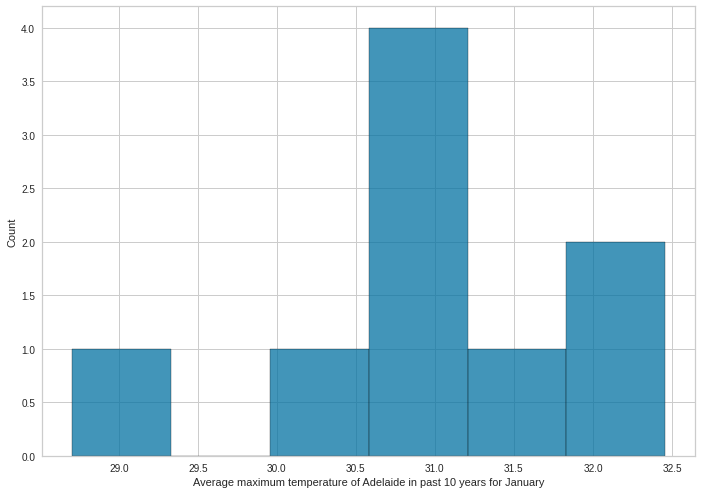

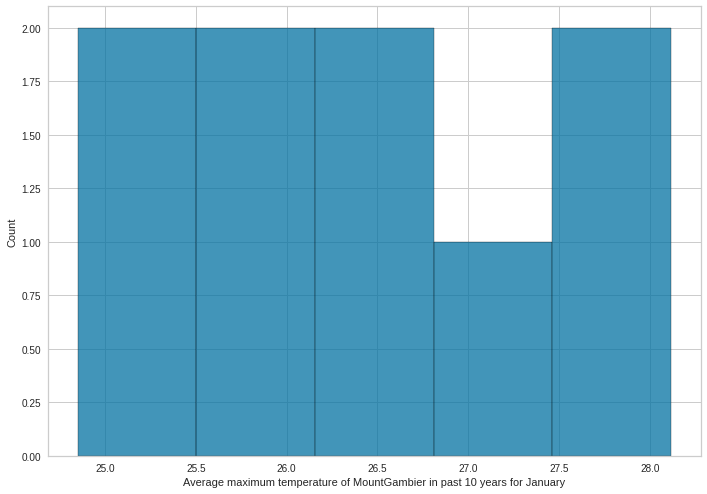

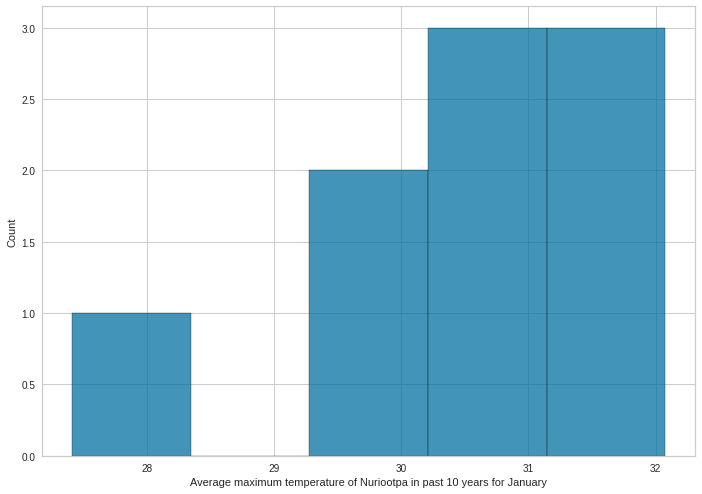

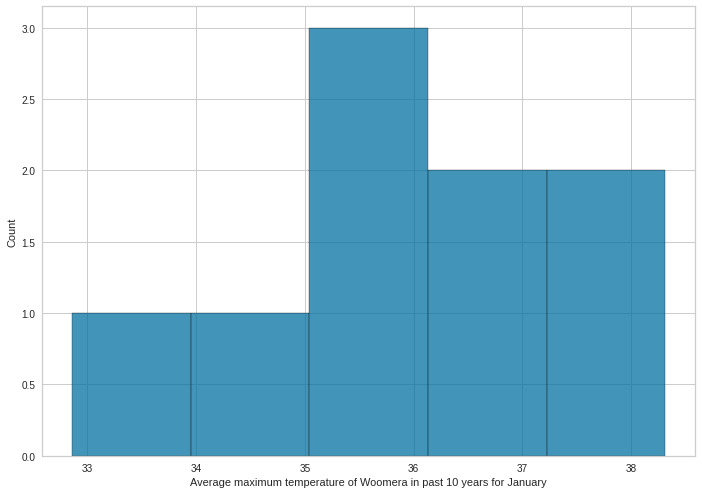

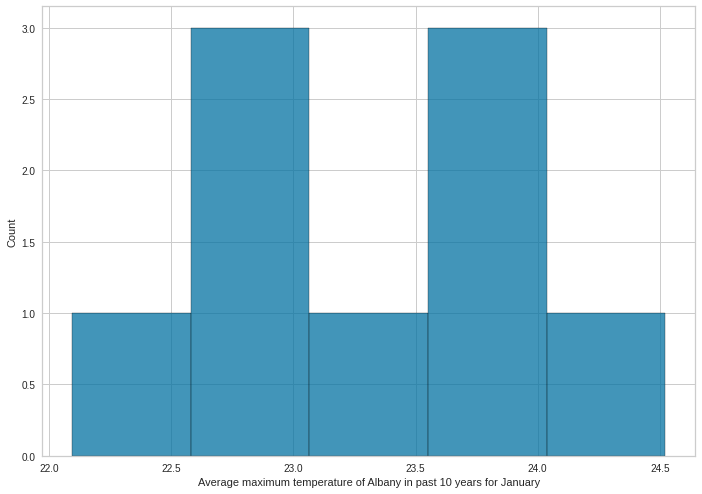

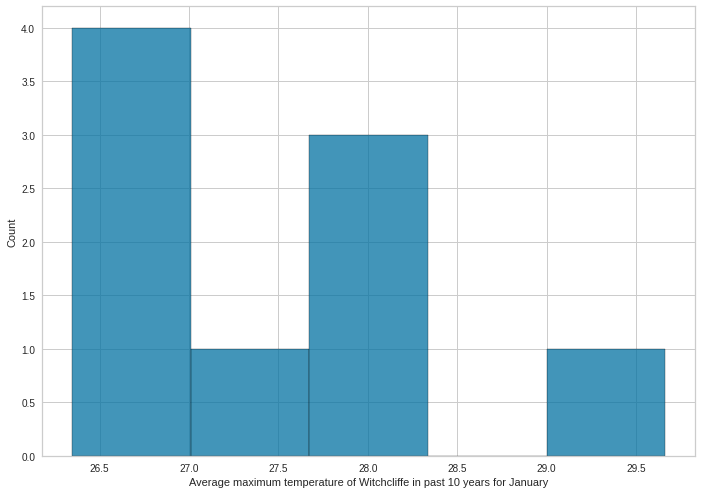

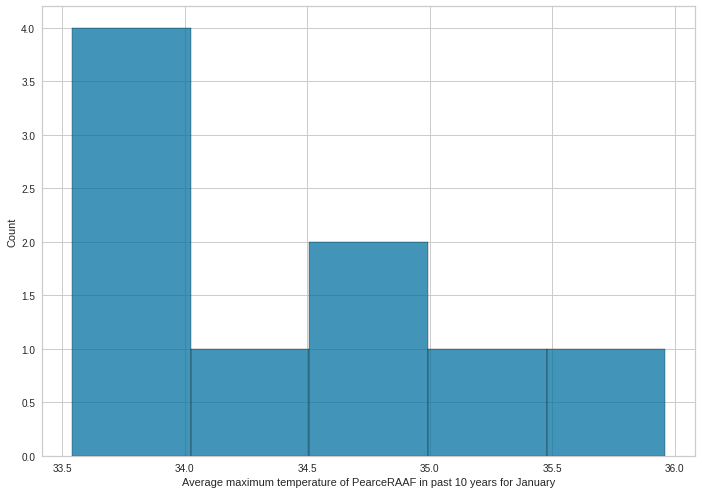

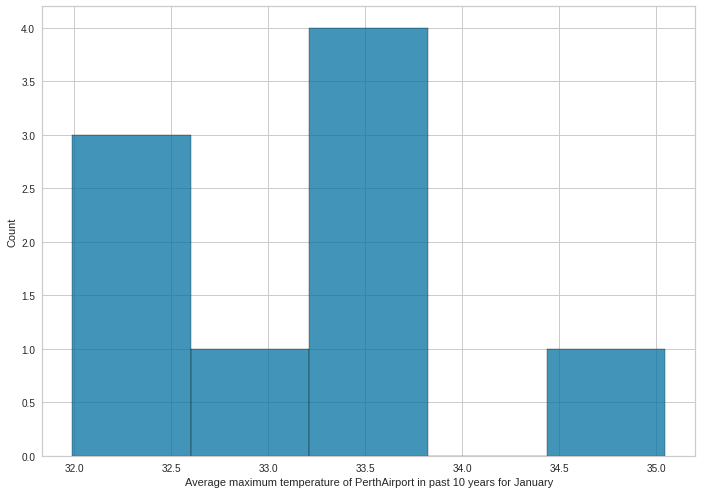

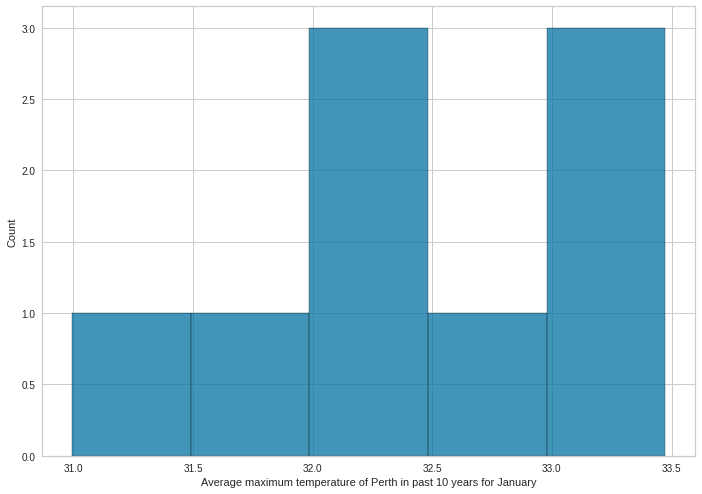

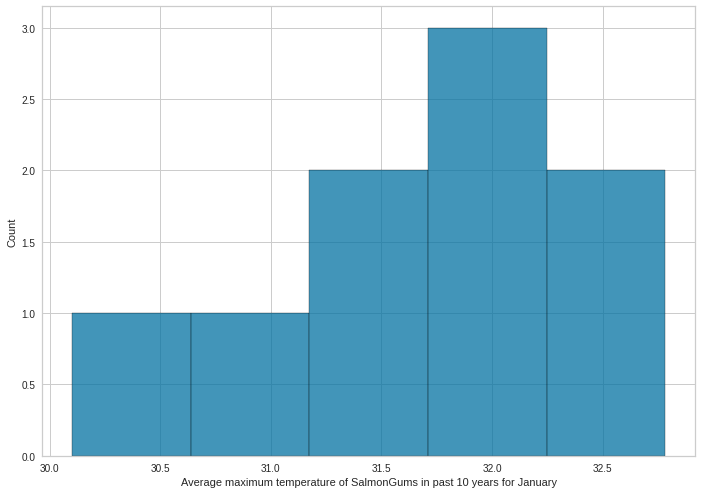

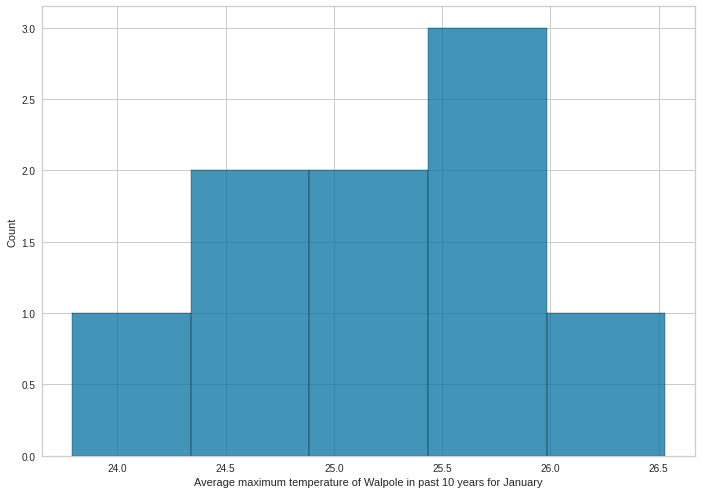

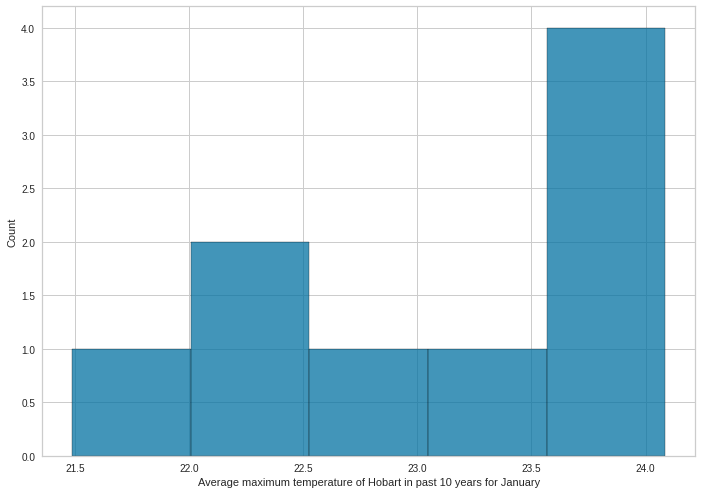

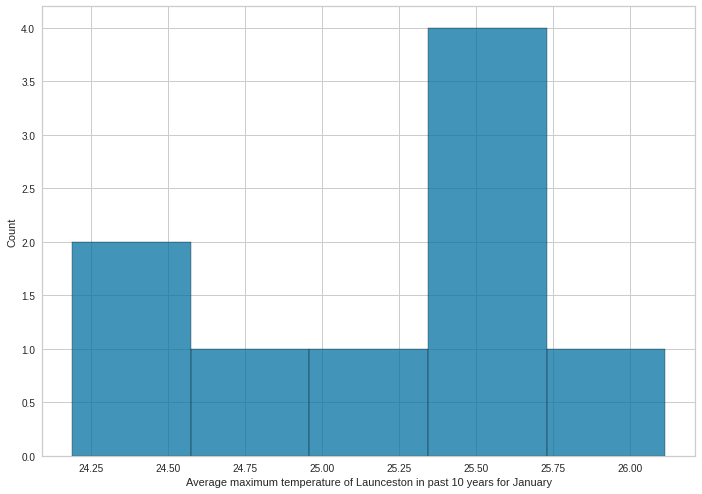

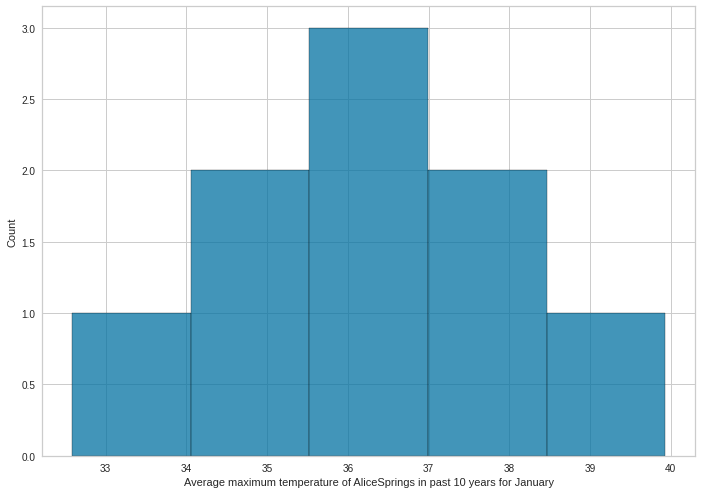

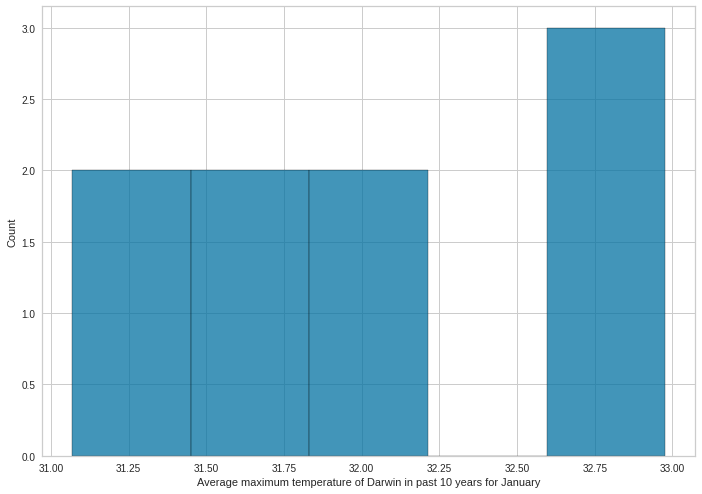

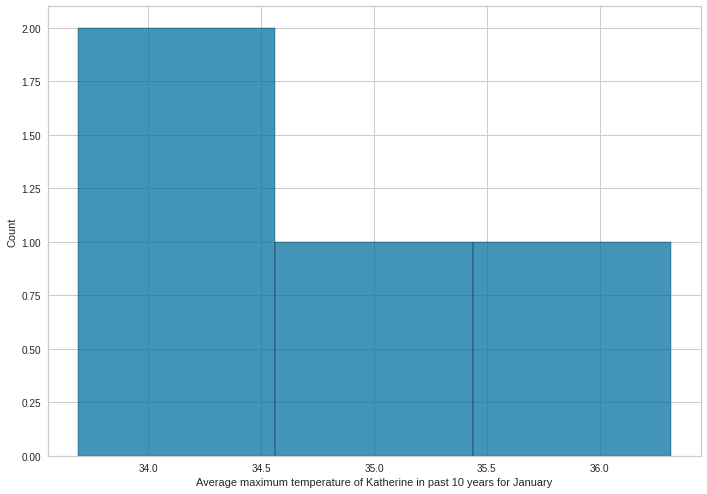

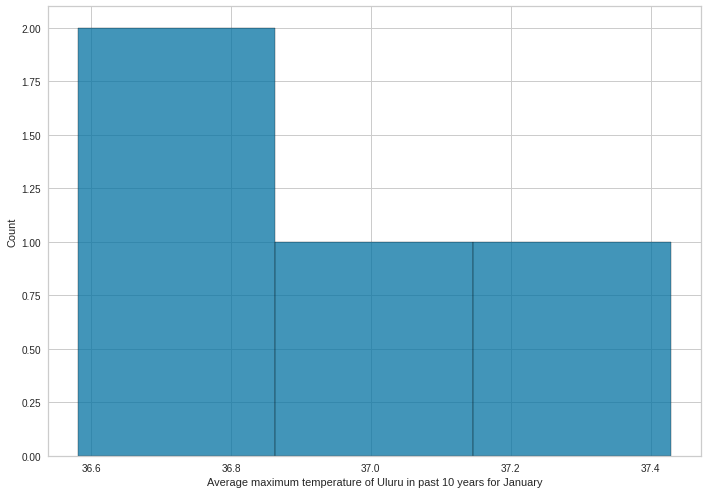

In [ ]:
# This histogram will show the average maximum temperature of different locations on January in last 10 years.

def monthlyAvgMaxTemp(year):
  janRange = (data_set_after_droping_duplicates['Date'] >= '{0}-01-01'.format(year)) & (data_set_after_droping_duplicates['Date'] <= '{0}-01-31'.format(year))
  janValue=data_set_after_droping_duplicates.loc[janRange]
  jan=janValue['MaxTemp'].mean()
  return jan

array_locyear=[]
for loca in list_of_uniqueLocations:
  for year in year_array:
    data_set_after_droping_duplicates=new_data_set.query('Location==@loca')
    my_string = '{0}-{1}-{2}'.format(loca,monthlyAvgMaxTemp(year),year)
    array_locyear.append(my_string)
set_Data=data_set_after_droping_duplicates
for value in array_locyear:
  val=value.split('-')
  if val[1]=='nan':
    val=1
  else:
    set_Data = set_Data.append({'Location': val[0],'Avg':float(val[1]),'Year':val[2]}, ignore_index=True)
set_Data=set_Data.sort_values(by=['Location'])
location="MountGambier"
for locationWise in list_of_uniqueLocations:
  new_dataByyear=set_Data.query('Location==@locationWise')
  updated_set=new_dataByyear[['Avg','Year']].sort_values(by=['Year'])

  hist_dimensions = (11.7, 8.27)
  fig = plt.subplots(figsize=hist_dimensions)
  hist_plot=sns.histplot(data=updated_set, x="Avg");
  hist_plot.set(xlabel='Average maximum temperature of {0} in past 10 years for January'.format(locationWise), ylabel='Count');




In [ ]:
print('New data set length')
len(data_set_after_droping_duplicates)

New data set length


142193

c) **Problem**- Boxplot or Histogram for numeric columns
  **Output**- 

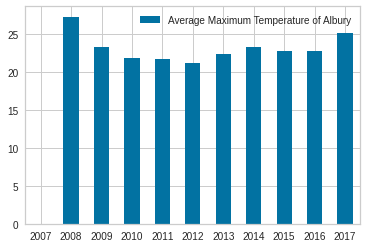

In [ ]:
#In this bar plot, the average maximum temperature of a particular location will be displayed annually.

bar_data=new_data_set
bar_data['Date'] = pd.to_datetime(new_data_set['Date'])
bar_array=[]

def locationWiseAnnualAvgTemp(year,location):
  bar_data1=set_new.query('Location==@location')
  avg=bar_data1['MaxTemp'].mean()
  return avg
location='Albury'
for year in year_array:
  set_new=bar_data[bar_data['Date'].dt.year == year]
  d=locationWiseAnnualAvgTemp(year,location)
  bar_array.append(d)

index = year_array
df = pd.DataFrame({'Average Maximum Temperature of {0}'.format(location): bar_array}, index=index)
ax = df.plot.bar(rot=0)

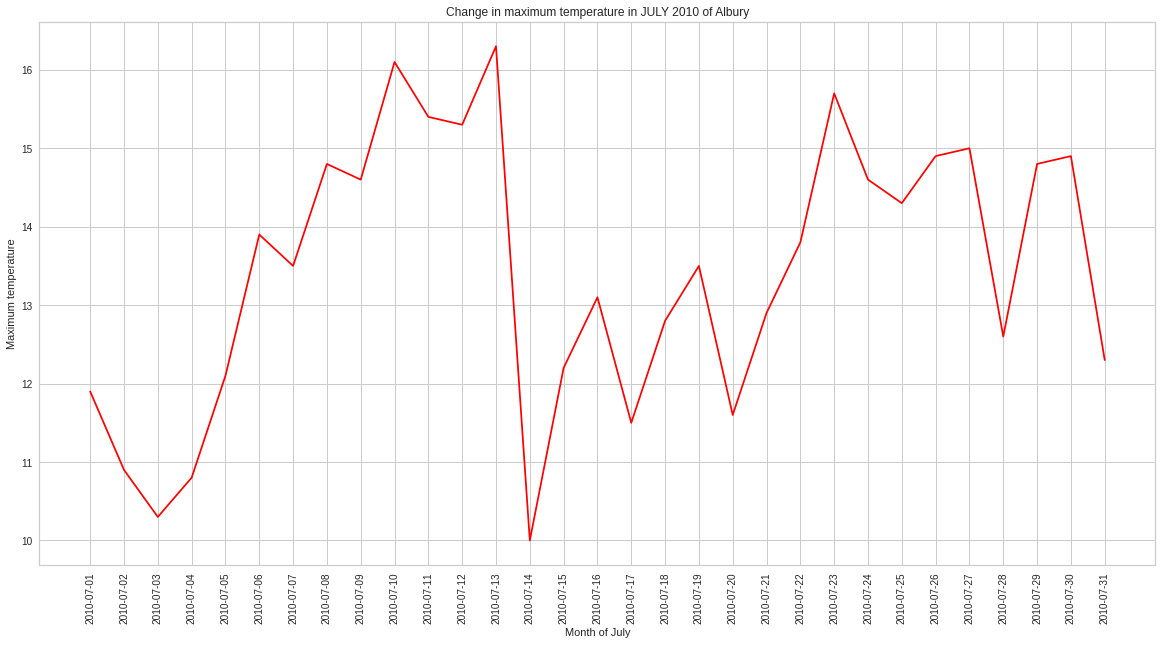

In [ ]:
#Plotting line graph for maximum Temperature changes of july 2010 in particular location
from dateutil import rrule
from datetime import datetime
location='Albury'
def datelist():
  datesArray=[]
  a = '20100701'
  b = '20100731'
  for dt in rrule.rrule(rrule.DAILY,
                        dtstart=datetime.strptime(a, '%Y%m%d'),
                        until=datetime.strptime(b, '%Y%m%d')):
    datesArray.append(dt.strftime('%Y-%m-%d'))
  return datesArray
 
def plotLineByLocation(location):
  tempDate=new_data_set.query('Location==@location')
  mask = (tempDate['Date'] >= '2010-07-01') & (tempDate['Date'] <= '2010-07-31')
  tempDate=tempDate.loc[mask]
  return tempDate

x = np.array(datelist())
y = plotLineByLocation(location)['MaxTemp']
# plotting 
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Change in maximum temperature in JULY 2010 of {0}".format(location))  
plt.xlabel("Month of July")  
plt.ylabel("Maximum temperature")  
#plt.figure(figsize=(20,10))
plt.plot(x, y, color ="red")  
plt.xticks(rotation=90)
plt.show()

###**Part 3- Multivariant Analysis**

**Scatter Plot- To compare numeric columns**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

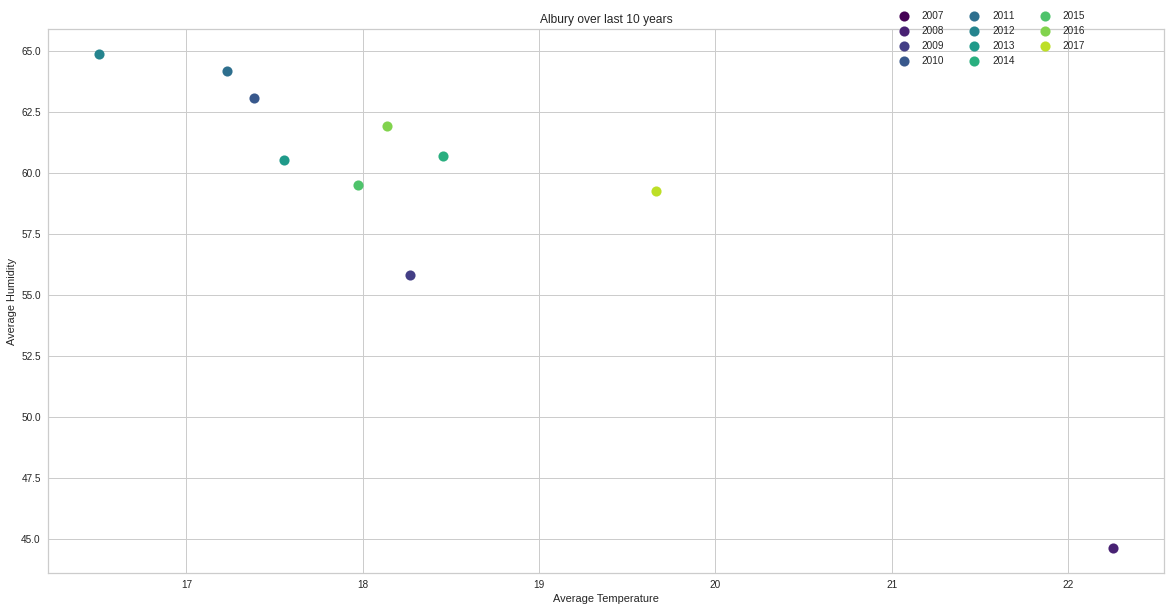

In [ ]:
# Average temperature and humidity over last 10 years of particular location

import matplotlib.cm as cm
import matplotlib.colors as colors
location="Albury"
data_for_scattered_plot=new_data_set[['Location','Date','Temp9am','Temp3pm','Humidity9am','Humidity3pm']]
data_for_scattered_plot=data_for_scattered_plot.query('Location==@location')
yearArray=[]
tempAvg=[]
humAvg=[]
#print(data_for_scattered_plot)
def scatterCalculations(year):
  temp_frame['avg_temp']=temp_frame[['Temp9am','Temp3pm']].mean(axis=1)
  temp_frame['avg_humidity']=temp_frame[['Humidity9am','Humidity3pm']].mean(axis=1)
  #print(temp_frame['avg_temp'])
  yearArray.append(year)
  tempAvg.append(temp_frame['avg_temp'].mean())
  humAvg.append(temp_frame['avg_humidity'].mean())
  #print(tempAvg)
for year in year_array:
  temp_frame=data_for_scattered_plot[data_for_scattered_plot['Date'].dt.year == year]
  #print(temp_frame)
  scatterCalculations(year)
#print(tempAvg)
fig, ax = plt.subplots()
data={'Year': yearArray, 'AverageTemperature': tempAvg,'AverageHumidity':humAvg}
df = pd.DataFrame(data)
colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['Year']))]

for i,c in enumerate(colorlist):

    x = df['AverageTemperature'][i]
    y = df['AverageHumidity'][i]
    l = df['Year'][i]

    ax.scatter(x, y, label=l, s=100, linewidth=0.1, c=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.75, 1.05),
          ncol=3, fancybox=True, shadow=True)
ax.set(title = f'{location} over last 10 years',
       xlabel = "Average Temperature",
       ylabel = "Average Humidity")
plt.show();

**Count Plot - Comparing categorical data**

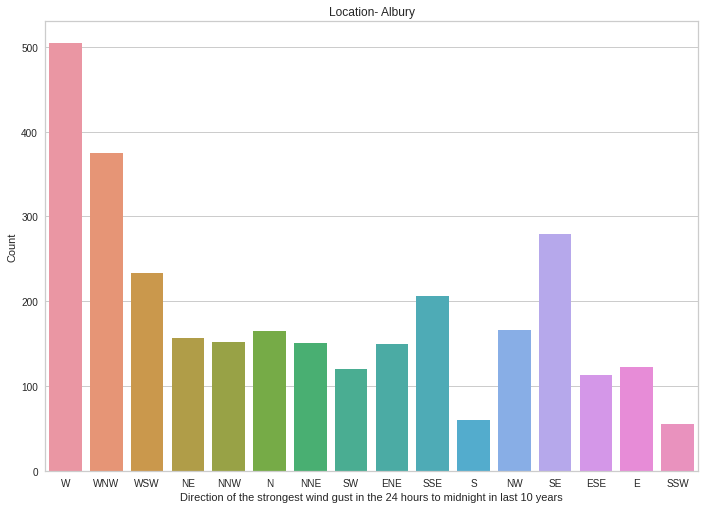

In [ ]:
#It is showing the number of times, the strongest wind gust has taken particular direction in 24 hour over last 10 years of particular location

import seaborn as sns
location="Albury"
data_for_count_plot=new_data_set[['Location','Date','WindGustDir']]
data_for_count_plot=data_for_count_plot.query('Location==@location')
data_for_count_plot
WindGustDir=['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
data_for_count_plot['WindGustDir'].value_counts()
a4_dims = (11.7, 8.27)
fig, ax1 = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x ='WindGustDir', data = data_for_count_plot,ax=ax1)
ax.set(xlabel='Direction of the strongest wind gust in the 24 hours to midnight in last 10 years', ylabel='Count')
# Show the plot
plt.title(f'Location- {location}')
plt.show()

### **Part 4 - After performing data exploration on country "Albury", now lets predict the chances of rainfall of tomorrow.**

**Step 1:** Selecting the range of city "Albury" data of year 2017

In [ ]:
filteredData=new_data_set[new_data_set['Location']=='Albury']

In [ ]:
filteredData['Date'] = pd.to_datetime(filteredData['Date'])
alburyData = filteredData[(filteredData['Date'] >= '2017-02-25') & (filteredData['Date'] <= '2017-06-25')]
alburyData

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2919,2017-02-25,Albury,15.4,30.3,0.0,NaN,NaN,SE,31.0,SE,S,20.0,11.0,51.0,35.0,1019.4,1016.4,NaN,NaN,19.5,28.9,No,No
2920,2017-02-26,Albury,14.7,30.9,0.0,NaN,NaN,NE,31.0,SE,SSE,13.0,13.0,55.0,30.0,1020.8,1018.5,7.0,2.0,21.0,28.3,No,No
2921,2017-02-27,Albury,14.1,32.2,0.0,NaN,NaN,NNE,48.0,SSE,SE,2.0,13.0,60.0,28.0,1023.7,1020.2,NaN,NaN,20.1,30.2,No,No
2922,2017-02-28,Albury,15.3,33.6,0.0,NaN,NaN,SSE,50.0,SE,SSE,9.0,13.0,59.0,26.0,1022.7,1019.0,NaN,NaN,20.7,32.0,No,No
2923,2017-03-01,Albury,16.7,34.3,0.0,NaN,NaN,W,24.0,SSE,ESE,6.0,6.0,57.0,28.0,1021.5,1017.8,NaN,NaN,22.0,32.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,NaN,NaN,ENE,15.0,NaN,NNE,0.0,2.0,100.0,62.0,1029.4,1026.7,8.0,NaN,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,NaN,NaN,W,17.0,S,NaN,6.0,0.0,100.0,66.0,1029.4,1025.9,8.0,1.0,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,NaN,NaN,SE,44.0,SSE,SSE,9.0,2.0,100.0,81.0,1022.3,1017.7,8.0,1.0,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,NaN,NaN,WSW,28.0,SW,W,4.0,15.0,100.0,49.0,1018.8,1017.2,7.0,6.0,3.9,13.1,No,No


**Step 2:** Check the nulls in data and replacing them.

In [ ]:
alburyData.isnull().sum()
alburyData2017=alburyData.drop(['Cloud3pm','Cloud9am','Date','Location','Evaporation','Sunshine'],axis=1)
alburyData2017.dropna(inplace=True)
alburyData2017

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2919,15.4,30.3,0.0,SE,31.0,SE,S,20.0,11.0,51.0,35.0,1019.4,1016.4,19.5,28.9,No,No
2920,14.7,30.9,0.0,NE,31.0,SE,SSE,13.0,13.0,55.0,30.0,1020.8,1018.5,21.0,28.3,No,No
2921,14.1,32.2,0.0,NNE,48.0,SSE,SE,2.0,13.0,60.0,28.0,1023.7,1020.2,20.1,30.2,No,No
2922,15.3,33.6,0.0,SSE,50.0,SE,SSE,9.0,13.0,59.0,26.0,1022.7,1019.0,20.7,32.0,No,No
2923,16.7,34.3,0.0,W,24.0,SSE,ESE,6.0,6.0,57.0,28.0,1021.5,1017.8,22.0,32.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,3.2,12.9,0.2,ENE,15.0,S,SE,6.0,7.0,100.0,80.0,1026.9,1024.7,6.5,12.2,No,No
3032,1.0,17.0,0.0,W,17.0,SSW,E,2.0,6.0,100.0,52.0,1029.4,1028.0,5.1,15.8,No,No
3034,1.2,14.9,0.2,ESE,11.0,SW,SE,4.0,2.0,100.0,66.0,1030.6,1027.2,3.4,14.0,No,No
3037,1.1,11.9,0.0,SE,44.0,SSE,SSE,9.0,2.0,100.0,81.0,1022.3,1017.7,2.7,10.2,No,No


In [ ]:
alburyData2017.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Step 3:** Converting categorical data into numeric data

In [ ]:
RainTomorrow=pd.get_dummies(alburyData2017['RainTomorrow'],drop_first=True)
RainTomorrow.rename(columns={"Yes": "Rain_Tomorrow"},inplace=True)

RainToday=pd.get_dummies(alburyData2017['RainToday'],drop_first=True)
windGustDir=pd.get_dummies(alburyData2017['WindGustDir'],drop_first=True)


**Step 4:** Concatenate all the columns in main dataframe

In [ ]:
alburyData2017_dummies=pd.concat([windGustDir,RainToday,RainTomorrow],axis=1)

alburyData2017Area=alburyData2017.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)

In [ ]:
alburyData2017_final=pd.concat([alburyData2017_dummies,alburyData2017Area],axis=1)
alburyData2017_final=alburyData2017_final.dropna()
alburyData2017_final

,ENE,ESE,N,NE,NNE,NNW,NW,SE,SSE,SSW,SW,W,WNW,WSW,Yes,Rain_Tomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
2919,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.4,30.3,0.0,31.0,20.0,11.0,51.0,35.0,1019.4,1016.4,19.5,28.9
2920,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14.7,30.9,0.0,31.0,13.0,13.0,55.0,30.0,1020.8,1018.5,21.0,28.3
2921,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,14.1,32.2,0.0,48.0,2.0,13.0,60.0,28.0,1023.7,1020.2,20.1,30.2
2922,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15.3,33.6,0.0,50.0,9.0,13.0,59.0,26.0,1022.7,1019.0,20.7,32.0
2923,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16.7,34.3,0.0,24.0,6.0,6.0,57.0,28.0,1021.5,1017.8,22.0,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.2,12.9,0.2,15.0,6.0,7.0,100.0,80.0,1026.9,1024.7,6.5,12.2
3032,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,17.0,0.0,17.0,2.0,6.0,100.0,52.0,1029.4,1028.0,5.1,15.8
3034,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2,14.9,0.2,11.0,4.0,2.0,100.0,66.0,1030.6,1027.2,3.4,14.0
3037,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.1,11.9,0.0,44.0,9.0,2.0,100.0,81.0,1022.3,1017.7,2.7,10.2


###**Part 5 - Building Logistic Regression Model**

#### **Features Matrix and Target Vector**

**Target Vector(y)- Rain_tomorrow**


**Feature matrix(x)- Other columns except "Rain_tomorrow" in dataset "alburyData2017_final"**

In [ ]:
x=alburyData2017_final.drop(['Rain_Tomorrow'],axis=1)
y=alburyData2017_final['Rain_Tomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()
logModel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict=logModel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[21,  0],
       [ 3,  1]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.88

**The score appears to be 88% or 0.8.**


###**Conclusion-**

###**Therefore, the final score is above 0.5, which is considered as a very good score. Hence, the logistic model fits very well to make accurate rainfall prediction.**